In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
from google.colab import drive
!pip install ipython-autotime
%load_ext autotime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=1ab48db4025fac62490fe60102517ef4bdb22804324e5dee77d04d032e21931e
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [2]:
drive.mount('/content/drive')
data_file = '/content/drive/My Drive/Data Science Projects/Kickstarter/clean_data.csv'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
time: 22.1 s


In [5]:
df = pd.read_csv(data_file,index_col=0,sep = '\t')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


time: 11min 30s


In [6]:
df.head()

,blurb,goal,pledged,state,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,staff_pick,static_usd_rate,spotlight,creator.id,creator.name,location.name,location.type,category.name,category.slug,category.parent_name,profile.show_feature_image,profile.should_show_feature_image_section,urls.web.project,duration,goal_in_usd,pledged_in_usd
0,The LoKi MUT is a small EDC multitool that inc...,2000,2474.0,successful,False,US,USD,2017-02-03 04:37:43,2017-02-03 04:37:43,2016-12-02 16:46:54,2017-01-04 04:37:43,False,1.0,True,872303310,Travis stevenson,Dallas,Town,Gadgets,technology/gadgets,Technology,False,True,https://www.kickstarter.com/projects/872303310...,30.0,2000.000000,2474.0
1,Handmade wooden ear plugs and stretchers in an...,500,0.0,failed,False,AT,EUR,2015-12-18 09:22:34,2015-12-18 09:22:35,2015-11-16 15:19:07,2015-11-18 09:22:34,False,1.06609467,False,1539029550,Lucas Neumann,Micheldorf,Town,Woodworking,crafts/woodworking,Crafts,False,True,https://www.kickstarter.com/projects/153902955...,30.0,533.047335,0.0
2,"Broke, But Not Broken LP #1",3000,4085.0,successful,False,US,USD,2020-01-13 17:01:20,2020-01-13 17:01:20,2019-12-09 20:28:22,2019-12-13 17:01:20,False,1.0,True,1882152174,Michael Kane,Worcester,Town,Music,music,Music,False,True,https://www.kickstarter.com/projects/themornin...,31.0,3000.000000,4085.0
3,Maker Box is an AR play experience that combin...,10000,10353.0,successful,False,US,USD,2016-12-02 21:56:44,2016-12-02 21:56:44,2016-10-13 02:43:05,2016-11-02 20:56:44,False,1.0,True,1031612808,Manoj Jacob,Los Gatos,Town,Children's Books,publishing/children's books,Publishing,False,True,https://www.kickstarter.com/projects/getquriou...,30.0,10000.000000,10353.0
4,A children's book about a robots search for lo...,11000,14862.0,successful,False,US,USD,2016-06-06 04:01:00,2016-06-06 04:01:00,2016-04-17 03:40:01,2016-04-29 04:54:43,True,1.0,True,1480798481,Joshua Margolis,Oakland,Town,Children's Books,publishing/children's books,Publishing,False,True,https://www.kickstarter.com/projects/148079848...,37.0,11000.000000,14862.0


time: 68.2 ms


In [4]:
df.iloc[11]

blurb                                        Do you love cute cats?\nDo you love cat calend...
goal                                                                                       750
pledged                                                                                   1002
state                                                                               successful
disable_communication                                                                    False
country                                                                                     GB
currency                                                                                   GBP
deadline                                                                   2016-11-02 06:11:36
state_changed_at                                                           2016-11-02 06:11:36
created_at                                                                 2016-09-28 17:10:28
launched_at                                       

time: 13.5 ms


In [0]:
df.isnull().sum()

blurb                                          19
goal                                            0
pledged                                         0
state                                           0
disable_communication                           0
country                                         0
currency                                        0
deadline                                        0
state_changed_at                                0
created_at                                      0
launched_at                                     0
staff_pick                                      0
static_usd_rate                                 0
spotlight                                       0
creator.id                                      0
creator.name                                    0
location.name                                1051
location.type                                1051
category.name                                   0
category.slug                                   0


time: 235 ms


In [0]:
df.describe()

,goal,pledged,static_usd_rate,creator.id,duration,goal_in_usd,pledged_in_usd,launched_year,deadline_year
count,3.104660e+05,3.104660e+05,310466.000000,3.104660e+05,310466.000000,3.104660e+05,3.104660e+05,310466.000000,310466.000000
mean,4.582806e+04,1.833216e+04,1.010493,1.073501e+09,33.482629,3.777015e+04,1.347921e+04,2015.316154,2015.386058
std,1.087164e+06,4.096788e+05,0.219060,6.198338e+08,12.515036,9.824324e+05,1.236392e+05,2.469390,2.469868
min,1.000000e-02,0.000000e+00,0.008772,3.000000e+00,1.000000,1.000000e-02,0.000000e+00,2009.000000,2009.000000
25%,1.777000e+03,7.000000e+01,1.000000,5.381636e+08,29.000000,1.671570e+03,6.845233e+01,2014.000000,2014.000000
50%,5.000000e+03,1.167000e+03,1.000000,1.073051e+09,30.000000,5.000000e+03,1.152916e+03,2015.000000,2015.000000
75%,1.500000e+04,6.065000e+03,1.000000,1.609779e+09,36.000000,1.500000e+04,5.859839e+03,2017.000000,2017.000000
max,1.000000e+08,1.469102e+08,1.716408,2.147483e+09,97.000000,1.059990e+08,2.033899e+07,2020.000000,2020.000000


time: 149 ms


In [0]:
df.dropna(inplace=True)

time: 338 ms


In [0]:
df['successful'] = df.state.apply(lambda x: True if x == 'successful' else False)

time: 56.9 ms


In [0]:
df['successful'] = df.state.apply(lambda x: True if x == 'successful' else False)
df.drop('state',axis = 1,inplace = True)

time: 138 ms


# Seaborn Config

In [0]:
sns.set_style("darkgrid")
sns.set_context("paper")
matplotlib.rcParams['figure.figsize'] = (10, 5)

time: 2.77 ms


# Time Analysis

In [0]:
for col in ['deadline','state_changed_at', 'created_at','launched_at']:
  df[col] = pd.to_datetime(df[col])

time: 514 ms


In [0]:
monthly = df.set_index('launched_at').resample('M')

time: 478 ms


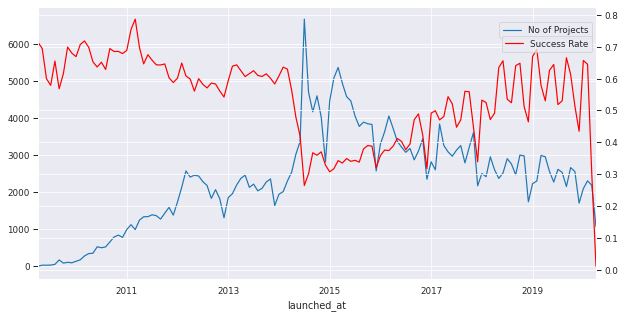

time: 598 ms


In [0]:
fig, ax = plt.subplots();
ax2 = ax.twinx();
monthly['successful'].mean().plot(ax = ax2,c = 'red',label = 'Success Rate');
monthly['successful'].count().plot(ax = ax, label = 'No of Projects');
ax.legend(loc='upper right', bbox_to_anchor=(0.5, 0.46, 0.5, 0.5));
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, 0.41, 0.5, 0.5));

In [0]:
annual = df.set_index('launched_at').resample('Y')

time: 559 ms


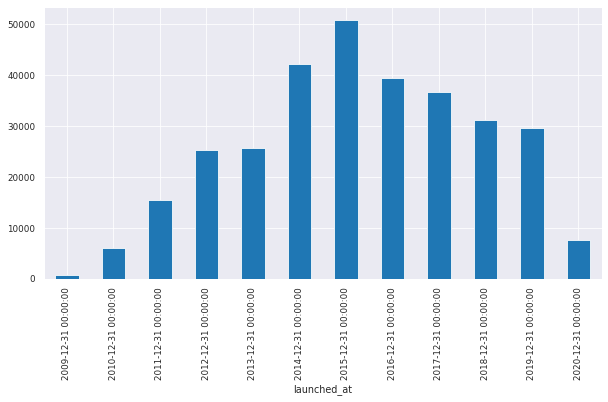

time: 278 ms


In [0]:
fig, ax = plt.subplots()
annual['successful'].count().plot.bar()

To Plot:

A) Total Projects and Success Rate by month (line)

B) Total Pledged and Total Goal by Year by parent [bullet char]

C) Total Projects and Total Raised by Year[only successful projects] 

D) Total pledged by category by year (animated bubble chart)

D) Country heatmap and age of empires chart by year


Parent Category by
A) X = NUMBER
B) Y = MEDIAN GOAL
C) SIZE = SUCCESS RATE
D) YEAR



In [0]:
#A
monthly['successful'].agg(['mean','sum'])

,mean,sum
launched_at,,
2009-04-30,0.714286,5.0
2009-05-31,0.694444,25.0
2009-06-30,0.600000,21.0
2009-07-31,0.578947,22.0
2009-08-31,0.655172,38.0
...,...,...
2019-12-31,0.434681,742.0
2020-01-31,0.656966,1377.0
2020-02-29,0.645147,1489.0


time: 1.53 s


In [0]:
df['launched_year'] = df['launched_at'].dt.year
df['deadline_year'] = df['deadline'].dt.year

time: 85 ms


In [0]:
df.groupby(['launched_year','category.parent_name'])['goal_in_usd','pledged_in_usd'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,launched_year,category.parent_name,goal_in_usd,pledged_in_usd
0,2009,Art,5.215995e+05,3.289266e+05
1,2009,Comics,4.466000e+04,6.562602e+04
2,2009,Crafts,1.687500e+04,8.260000e+03
3,2009,Dance,2.180000e+04,2.160849e+04
4,2009,Design,3.947900e+04,3.455822e+04
...,...,...,...,...
175,2020,Music,4.307506e+06,3.170242e+06
176,2020,Photography,9.227749e+05,7.802799e+05
177,2020,Publishing,4.626460e+06,3.727262e+06
178,2020,Technology,4.797420e+07,1.419892e+07


time: 59.1 ms


In [0]:
df.columns

Index(['blurb', 'goal', 'pledged', 'disable_communication', 'country',
       'currency', 'deadline', 'state_changed_at', 'created_at', 'launched_at',
       'staff_pick', 'static_usd_rate', 'spotlight', 'creator.id',
       'creator.name', 'location.name', 'location.type', 'category.name',
       'category.slug', 'category.parent_name', 'profile.show_feature_image',
       'profile.should_show_feature_image_section', 'urls.web.project',
       'duration', 'goal_in_usd', 'pledged_in_usd', 'successful',
       'launched_year', 'deadline_year'],
      dtype='object')

time: 4.62 ms


In [0]:
Total Pledged and Total Goal by Year by parent [bullet char]